In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import matplotlib
import matplotlib.pyplot as plt

Читаем наш Excel-файл, убираем ненужные столбцы.

Также убираем строчки, в которых вместо класса стоит IRR (их там всего ничего).

In [2]:
birulevo_df = pd.read_excel('data/birulevo sentiment coded.xlsx')

birulevo_df.drop(index=0, inplace = True)
birulevo_df.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], inplace = True)

irr_indices = birulevo_df[ birulevo_df["SENTIMENT"] == "IRR"].index
birulevo_df.drop(irr_indices, inplace=True)
birulevo_df.reset_index(drop=True, inplace=True)

Скопируем наши данные в нетронутом виде для дальнейшего сравнения.

In [3]:
birulevo_df_untouched = birulevo_df.copy()

In [4]:
birulevo_df.describe()

,user,tweet,SENTIMENT
count,1884,1884,1884
unique,46,1793,3
top,mynameisphilipp,#мвд объяснило драку мигрантов на северо-восто...,3
freq,101,2,952


Видно что некоторые твиты дублируются и их тоже лучше почистить.

In [5]:
birulevo_df.drop_duplicates(subset ="tweet", inplace = True)
birulevo_df.describe()

,user,tweet,SENTIMENT
count,1793,1793,1793
unique,46,1793,3
top,lifenews_ru,#бирюлево #россия наилучшая тактика:не призыва...,3
freq,101,1,912


Обрабатываем текст. В том числе отделим знаки препинания "!" и "." так как они указывают на эмоциональную составляющую твита.

In [6]:
birulevo_df["tweet"] = birulevo_df["tweet"].str.lower()
birulevo_df["tweet"] = birulevo_df["tweet"].str.replace('\S+/\S+|@\S+|-|,|:|\'|\"|”|“|;|1|2|3|4|5|6|7|8|9|0|\(|\)', ' ')
birulevo_df["tweet"] = birulevo_df["tweet"].str.replace(' \S\S | \S ', ' ')
birulevo_df["tweet"] = birulevo_df["tweet"].str.replace('!', ' !')
birulevo_df["tweet"] = birulevo_df["tweet"].str.replace('.', ' .')

Создадим третью выборку для проверки влияния хештегов.

In [7]:
birulevo_df_hashtag = birulevo_df.copy()

In [8]:
birulevo_df["tweet"] = birulevo_df["tweet"].str.replace('#', '')
birulevo_df_hashtag["tweet"] = birulevo_df_hashtag["tweet"].str.replace('#\S+', '')

Обучим три классификатора из sklearn на разных данных и посмотрим что выйдет.

In [9]:
tfidf_transformer = TfidfTransformer()
count_vect = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(birulevo_df['tweet'], birulevo_df['SENTIMENT'], random_state = 0)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [10]:
rf_clf = RandomForestClassifier().fit(X_train_tfidf, y_train)
rf1 = rf_clf.score(X_test_tfidf, y_test)

In [11]:
nb_clf = MultinomialNB().fit(X_train_tfidf, y_train)
nb1 =nb_clf.score(X_test_tfidf, y_test)

In [12]:
sv_clf = SVC().fit(X_train_tfidf, y_train)
sv1 = sv_clf.score(X_test_tfidf, y_test)

In [13]:
tfidf_transformer2 = TfidfTransformer()
count_vect2 = CountVectorizer()

X_train2, X_test2, y_train2, y_test2 = train_test_split(birulevo_df_untouched['tweet'], birulevo_df_untouched['SENTIMENT'], random_state = 0)

y_train2 = y_train2.astype('int')
y_test2 = y_test2.astype('int')

X_train_counts2 = count_vect2.fit_transform(X_train2)
X_train_tfidf2 = tfidf_transformer2.fit_transform(X_train_counts2)

X_test_counts2 = count_vect2.transform(X_test2)
X_test_tfidf2 = tfidf_transformer2.transform(X_test_counts2)

In [14]:
rf_clf2 = RandomForestClassifier().fit(X_train_tfidf2, y_train2)
rf2 = rf_clf2.score(X_test_tfidf2, y_test2)

In [15]:
nb_clf2 = MultinomialNB().fit(X_train_tfidf2, y_train2)
nb2 = nb_clf2.score(X_test_tfidf2, y_test2)

In [16]:
sv_clf2 = SVC().fit(X_train_tfidf2, y_train2)
sv2 = sv_clf2.score(X_test_tfidf2, y_test2)

In [17]:
tfidf_transformer3 = TfidfTransformer()
count_vect3 = CountVectorizer()

X_train3, X_test3, y_train3, y_test3 = train_test_split(birulevo_df_hashtag['tweet'], birulevo_df_hashtag['SENTIMENT'], random_state = 0)

y_train3 = y_train3.astype('int')
y_test3 = y_test3.astype('int')

X_train_counts3 = count_vect3.fit_transform(X_train3)
X_train_tfidf3 = tfidf_transformer3.fit_transform(X_train_counts3)

X_test_counts3 = count_vect3.transform(X_test3)
X_test_tfidf3 = tfidf_transformer3.transform(X_test_counts3)

In [18]:
rf_clf3 = RandomForestClassifier().fit(X_train_tfidf3, y_train3)
rf3 = rf_clf3.score(X_test_tfidf3, y_test3)

In [19]:
nb_clf3 = MultinomialNB().fit(X_train_tfidf3, y_train3)
nb3 = nb_clf3.score(X_test_tfidf3, y_test3)

In [20]:
sv_clf3 = SVC().fit(X_train_tfidf3, y_train3)
sv3 = sv_clf3.score(X_test_tfidf3, y_test3)

Построим график для сравнения результатов.

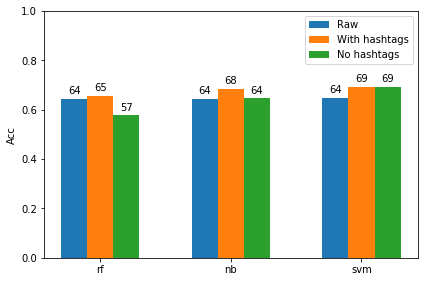

In [22]:
labels = ['rf', 'nb', 'svm']
hashtags = [rf1, nb1, sv1]
raw = [rf2, nb2, sv2]
no_hashtags = [rf3, nb3, sv3]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, raw, width, label='Raw')
rects2 = ax.bar(x, hashtags, width, label='With hashtags')
rects3 = ax.bar(x + width, no_hashtags, width, label='No hashtags')

ax.set_ylabel('Acc')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height*100)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.ylim(0, 1)

plt.show()